## Network generation with networkx - Tutorial

In [2]:
import numpy as np
import networkx as nx
import community as cm
import matplotlib.pyplot as plt
import json


### Network generation

See https://networkx.org/documentation/stable/reference/generators.html

In [3]:
Gx = nx.barabasi_albert_graph(100,3)

### Layout

See https://networkx.org/documentation/stable/reference/drawing.html

In [4]:
pos = nx.spring_layout(Gx,k=1,iterations=100)

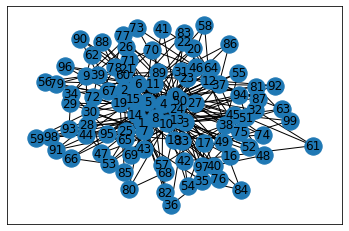

In [5]:
nx.draw_networkx(Gx,pos=pos)

## Better drawing

With community detection and degree distribution

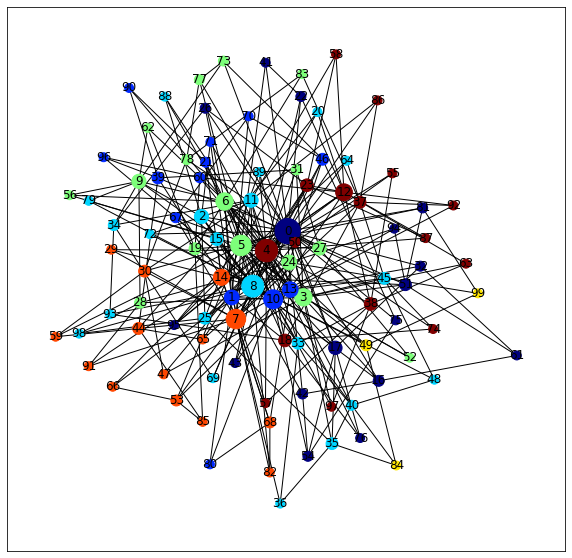

In [6]:
df = np.array(Gx.nodes)
# assign node labels
if len(df.shape) == 1:
    df = np.reshape(df,(len(df),1))
nodelabel = dict(zip(np.linspace(0,len(df[:,0])-1,len(df[:,0]),dtype=int),df[:,0]))
labels = {}
for idx, node in enumerate(Gx.nodes()):
    labels[node] = nodelabel[int(node)]
# detect communities
part = cm.best_partition(Gx)
values = [part.get(node) for node in Gx.nodes()]
# display degree as size
d = nx.degree(Gx)
dsize = [(d[v]+1)*100*0.2 for v in Gx.nodes()]

# plot
plt.figure(figsize=(10,10))
nx.draw_networkx(Gx,pos=pos,labels=labels,with_labels=True,cmap=plt.get_cmap('jet'),node_color=values,
                node_size=dsize)
plt.show()

In [7]:
networkjson = {}
networkjson["pos"] = {}
networkjson["degree"] = {}
networkjson["edges"] = {}
for n in d:
    networkjson["degree"][n[0]] = n[1]
for p in pos.keys():
    networkjson["pos"][p] = pos[p].tolist()
for e in Gx.edges:
    if (e[0] in networkjson["edges"].keys()):
        networkjson["edges"][e[0]].append(e[1])
    else:
        networkjson["edges"][e[0]] = [e[1]]
    if (e[1] in networkjson["edges"].keys()):
        networkjson["edges"][e[1]].append(e[0])
    else:
        networkjson["edges"][e[1]] = [e[0]]
for i in range(0,len(values)):
    


In [8]:
with open('./network.json', 'w') as f:
    json.dump(networkjson, f)


[0,
 1,
 2,
 3,
 6,
 3,
 3,
 5,
 2,
 3,
 1,
 2,
 6,
 1,
 5,
 2,
 0,
 0,
 6,
 3,
 2,
 1,
 0,
 6,
 3,
 2,
 0,
 3,
 3,
 5,
 5,
 3,
 0,
 2,
 2,
 2,
 2,
 6,
 6,
 1,
 2,
 0,
 0,
 0,
 5,
 2,
 1,
 5,
 2,
 4,
 6,
 0,
 3,
 5,
 0,
 6,
 3,
 6,
 6,
 5,
 1,
 0,
 3,
 6,
 2,
 5,
 5,
 1,
 5,
 2,
 1,
 1,
 2,
 3,
 6,
 0,
 0,
 3,
 3,
 2,
 1,
 0,
 5,
 3,
 4,
 5,
 6,
 6,
 2,
 2,
 1,
 5,
 6,
 2,
 0,
 0,
 1,
 6,
 2,
 4]